In [ ]:
!pip install pandas matplotlib seaborn scikit-learn



     Logistic Regression    

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       140
           1       0.95      0.91      0.93       159

    accuracy                           0.93       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299

Accuracy: 0.9264214046822743
Precision: 0.9477124183006536
Recall: 0.9119496855345912


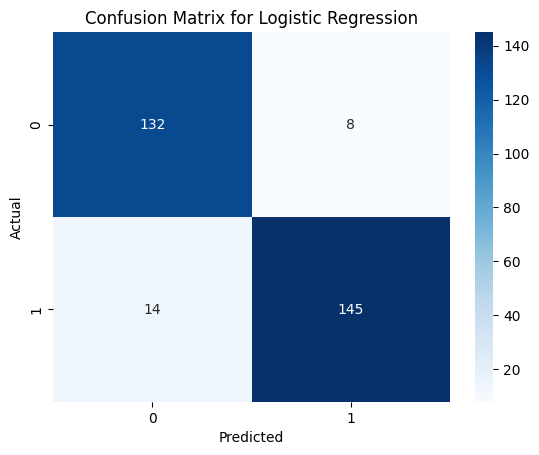


     Naive Bayes    

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       140
           1       0.94      0.94      0.94       159

    accuracy                           0.93       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299

Accuracy: 0.9331103678929766
Precision: 0.9371069182389937
Recall: 0.9371069182389937


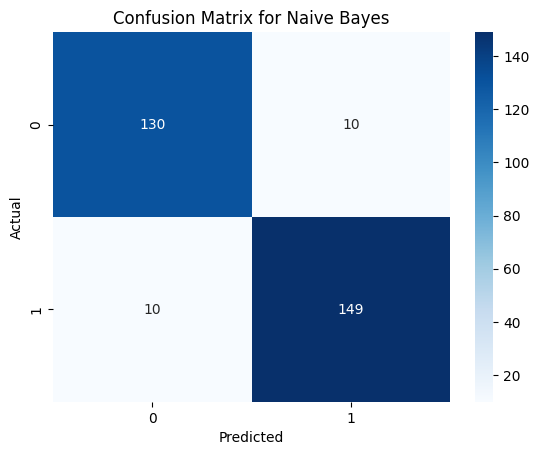

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score
)

# Read Sample dataset using pandas df
df = pd.read_csv('Naive-Bayes-Classification-Data.csv')

# Preprocessing remove null values
df.dropna(inplace=True)

# Encode categorical features if any
df = pd.get_dummies(df, drop_first=True)


X = df.drop('diabetes', axis=1)
y = df['diabetes']

#Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Use logistic regression and naive bayes Model to Train
log_model = LogisticRegression()
nb_model = GaussianNB()

log_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)


y_pred_log = log_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)


def evaluate_model(y_true, y_pred, model_name):
    print(f"\n     {model_name}    ")
    # Generate classification report
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='binary'))
    print("Recall:", recall_score(y_true, y_pred, average='binary'))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Logistic Regression
evaluate_model(y_test, y_pred_log, "Logistic Regression")

# Naive Bayes
evaluate_model(y_test, y_pred_nb, "Naive Bayes")




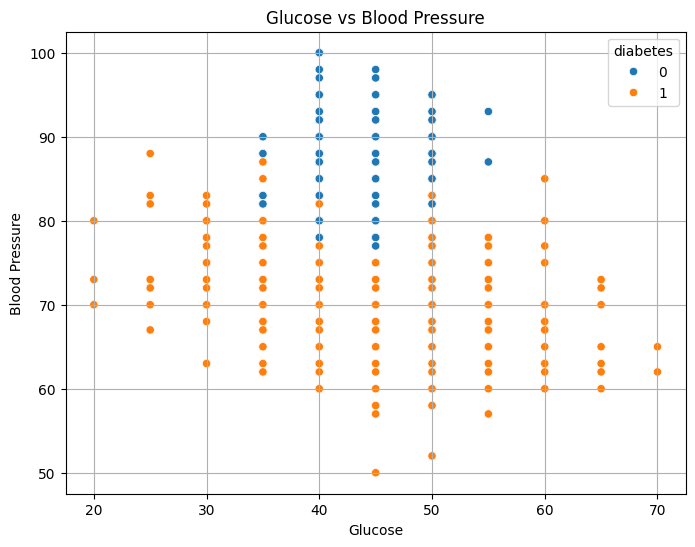

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='glucose', y='bloodpressure', hue='diabetes', )
plt.title('Glucose vs Blood Pressure')
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.grid(True)
plt.show()